In [139]:
# import libraries
import math
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u

In [140]:
# NOTES:
# only the first capital letter will determine the color of the star

#  76- 77  I2     h       RAh      ?Hours RA, equinox J2000, epoch 2000.0 (1)
# we will be using this one because it it the closest in time to us
# Earth's axises change over time

# 76 tell us it is the 76th character in the line
# I2 is an internget number(2)
# h is hours
#  78- 79  I2     min     RAm      ?Minutes RA, equinox J2000, epoch 2000.0 (1)
#  80- 83  F4.1   s       RAs      ?Seconds RA, equinox J2000, epoch 2000.0 (1)
# F4.1 - F = floating 4.1 = 4 places (32.1)
#      84  A1     ---     DE-      ?Sign Dec, equinox J2000, epoch 2000.0 (1)
# A1 = + or -, + = above the equator, - = under the quator

In [143]:
df = pd.read_csv('bsc5.csv')

In [144]:
df.shape

(9110, 54)

In [145]:
df.head(5)

,HR,Name,DM,HD,SAO,FK5,IRflag,r_IRflag,Multiple,ADS,...,n_RadVel,l_RotVel,RotVel,u_RotVel,Dmag,Sep,MultID,MultCnt,NoteFlag,Unnamed: 53
0,1,,BD+44 4550,3,36042,,,,,46,...,,,195,,4.2,21.6,AC,3,NaN,NaN
1,2,,BD-01 4525,6,128569,,,,,,...,V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,33 Psc,BD-06 6357,28,128572,1002,I,,,,...,SB1O,<,17,,2.5,0,,3,*,NaN
3,4,86 Peg,BD+12 5063,87,91701,2004,,,,,...,V?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,,BD+57 2865,123,21085,,,,,61,...,V,,,,0.8,1.4,,,*,NaN


In [146]:
df.tail(5)

,HR,Name,DM,HD,SAO,FK5,IRflag,r_IRflag,Multiple,ADS,...,n_RadVel,l_RotVel,RotVel,u_RotVel,Dmag,Sep,MultID,MultCnt,NoteFlag,Unnamed: 53
9105,9106,,CP-73 2346,225233,255629,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9106,9107,,BD+33 4828,225239,53622,2002,,,,,...,V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9107,9108,,CP-72 2800,225253,255631,1001,,,,,...,V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9108,9109,,BD+25 5068,225276,73731,,I,,,42,...,,,,,4.5,17.5,NaN,NaN,NaN,NaN
9109,9110,,BD+60 2667,225289,10962,,,,,,...,V,,50,,,,,,*,NaN


In [147]:
df.describe()

,HR
count,9110.00000
mean,4555.50000
std,2629.97481
min,1.00000
25%,2278.25000
50%,4555.50000
75%,6832.75000
max,9110.00000


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9110 entries, 0 to 9109
Data columns (total 54 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   HR           9110 non-null   int64 
 1   Name         9110 non-null   object
 2   DM           9110 non-null   object
 3   HD           9110 non-null   object
 4   SAO          9110 non-null   object
 5   FK5          9110 non-null   object
 6   IRflag       9110 non-null   object
 7   r_IRflag     9110 non-null   object
 8   Multiple     9110 non-null   object
 9   ADS          9110 non-null   object
 10  ADScomp      9110 non-null   object
 11  VarID        9110 non-null   object
 12  RAh1900      9110 non-null   object
 13  RAm1900      9110 non-null   object
 14  RAs1900      9110 non-null   object
 15  DE-1900      9110 non-null   object
 16  DEd1900      9110 non-null   object
 17  DEm1900      9110 non-null   object
 18  DEs1900      9110 non-null   object
 19  RAh          9110 non-null 

In [151]:
#Create two columns ra and dec in the data frame having the right ascension in decimal degrees and declinations in decimal degrees.
# RA = HH + (MM/60) + (SS/3600)
df['RAh'] = pd.to_numeric(df['RAh'], errors='coerce')
df['RAm'] = pd.to_numeric(df['RAm'], errors='coerce')
df['RAs'] = pd.to_numeric(df['RAs'], errors='coerce')
def ra_decimal_degrees(rah, ram, ras):
    RA_sum = rah + ram/60 + ras/3600
    RA = 15 * RA_sum 
    return RA
df['ra'] = df.apply(lambda row: ra_decimal_degrees(row['RAh'], row['RAm'], row['RAs']), axis=1)
#df.head()

In [153]:
#DEC = DD + (MM/60) + (SS/3600)
# if (sign is -)
#     dec = (-1) * DEC
df['DEd'] = pd.to_numeric(df['DEd'], errors='coerce')
df['DEm'] = pd.to_numeric(df['DEm'], errors='coerce')
df['DEs'] = pd.to_numeric(df['DEs'], errors='coerce')

def dec_decimal_degrees(sign, DEd, DEm, DEs):
    dec_sum = DEd + DEm/60 + DEs/3600
    if sign == '-':
        dec = -dec_sum 
        return dec
    else:
        return dec_sum
df['dec'] = df.apply(lambda row: dec_decimal_degrees(row['DE-'], row['DEd'], row['DEm'], row['DEs']), axis=1)
#df.head()

In [ ]:
#Create two columns long and lat that are the galactic longitude and galactic latitude. 
#Using Astropy convert ra and dec into galactic longitude and galactic latitude.

In [154]:
df['long'] = np.nan
df['lat'] = np.nan
def long_lat(ra, dec):
    try:
        c = SkyCoord(ra=ra, dec=dec, unit=(u.degree, u.degree), frame='icrs')
        galactic_c = c.galactic
        return galactic_c.l.degree, galactic_c.b.degree
    except ValueError:
        return np.nan, np.nan 
for index, row in df.iterrows():
    long, lat = long_lat(row['ra'], row['dec'])
    df.at[index, 'long'] = long
    df.at[index, 'lat'] = lat
#df.head()

In [161]:
#VI. Assign colors to the stars according to spectral types:
#O: violet or deep blue
#B: medium blue
#A: light blue
#F: green
#G: yellow
#K: orange
#M: red
#Any other star: black
color_dict = {
    "O": "blueviolet",
    "B": "mediumblue",
    "A": "lightblue",
    "F": "limegreen",
    "G": "gold",
    "K": "darkorange",
    "M": "red",
    "else": "black"
}
def color(sptype):
    first_letter = next((char for char in sptype if char.isupper()), None)
    if first_letter == "O":
        return first_letter
    elif first_letter == "B":
        return first_letter
    elif first_letter == "A":
        return first_letter
    elif first_letter == "F":
        return first_letter
    elif first_letter == "G":
        return first_letter
    elif first_letter == "K":
        return first_letter
    elif first_letter == "M":
        return first_letter
    else:
        return "else"
df['first_letter'] = df.apply(lambda row: color(row['SpType']), axis=1)
df['color'] = df['first_letter'].map(color_dict)
df.head()

,HR,Name,DM,HD,SAO,FK5,IRflag,r_IRflag,Multiple,ADS,...,MultID,MultCnt,NoteFlag,Unnamed: 53,ra,dec,long,lat,first_letter,color
0,1,,BD+44 4550,3,36042,,,,,46,...,AC,3,NaN,NaN,1.291250,45.229167,114.444693,-16.878664,A,lightblue
1,2,,BD-01 4525,6,128569,,,,,,...,NaN,NaN,NaN,NaN,1.265833,-0.503056,98.327548,-61.139797,G,gold
2,3,33 Psc,BD-06 6357,28,128572,1002,I,,,,...,,3,*,NaN,1.333750,-5.707500,93.754054,-65.932554,K,darkorange
3,4,86 Peg,BD+12 5063,87,91701,2004,,,,,...,NaN,NaN,NaN,NaN,1.425000,13.396111,106.186519,-47.982971,G,gold
4,5,,BD+57 2865,123,21085,,,,,61,...,,,*,NaN,1.566667,58.436667,117.034849,-3.916934,G,gold


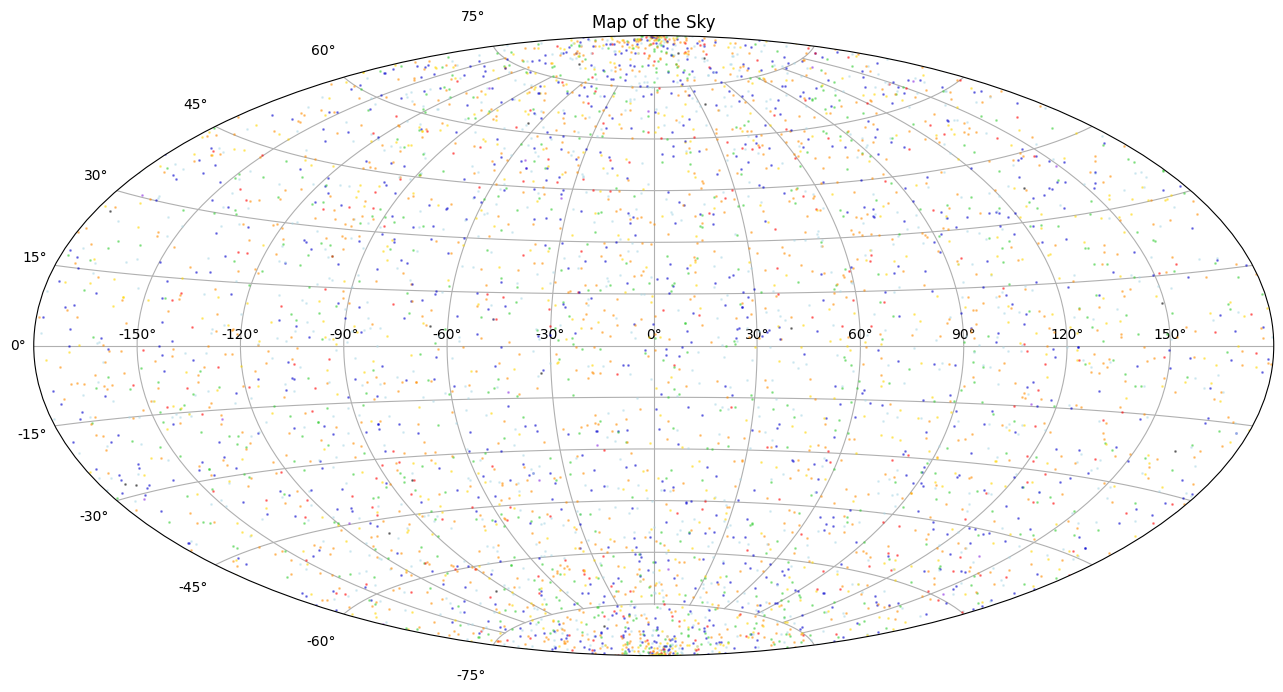

In [166]:
#VIII. Create an all-sky map of the stars in the Yale Bright Star Catalog under Aitoff projection. 
#Look at the sample code under Files -> HWK -> HWK4 -> sky_map.pdf. Make sure that your maps have titles and axes labels.
#Make an all-sky plot in equatorial coordinates for epoch 2000.0.
#Make an all-sky plot in galactic coordinates.

plt.figure(figsize=(16, 8.4))
plt.subplot(projection="aitoff")
plt.title("Map of the Sky")
for index, row in df.iterrows():
    plt.plot(row['long'], row['lat'], 'o', markersize=1, alpha=0.4, color=row['color'])
plt.grid(True)
plt.savefig('sky_map.pdf')
plt.show()

In [1]:
#df['Parallax']
#d = 1/P
# d(pc) = 1/P"
#pc = Parallax in seconds

#origin = SUN"
#d = r
#You need x, y, z AND r, theta
#r cos(theta)
#d = r